<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/notebooks/00_STL_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Î∂ÑÌï¥Î≤ï(Decomposition Method)

# Ï†ÑÏ≤¥ ÏïÑÏù¥ÎîîÏñ¥

* **Í∞ÄÏ†ï(Î°úÍ∑∏-Í∞ÄÎ≤ï Î™®Ìòï)**

  $$\log y_t ;=; T_t ;+; S_t ;+; R_t$$
  
  ÏõîÎ≥Ñ Î°úÍ∑∏Í∞ÄÍ≤©ÏùÑ **Ï∂îÏÑ∏ (T_t)**, **Í≥ÑÏ†àÏÑ± (S_t)**, **ÏûîÏ∞® (R_t)**Î°ú STLÎ°ú Î∂ÑÌï¥ÌïòÍ≥†,

  * $(T_t)$: Í∞ÑÎã®Ìûà **ÏÑ†ÌòïÌöåÍ∑ÄÎ°ú ÏßÅÏÑ† Ïô∏ÏÇΩ**
  * $(S_t)$: **ÎßàÏßÄÎßâ 1ÎÖÑ(12Í∞úÏõî) Ìå®ÌÑ¥ÏùÑ Î∞òÎ≥µ**(seasonal-naive)
  * $(R_t)$: Î≥¥ÏàòÏ†ÅÏúºÎ°ú **0**(ÌèâÍ∑†)ÏúºÎ°ú Îë†
      
   Ìï©Ï≥êÏÑú $$\hat{\log y}*{t+h}=\hat T*{t+h}+\hat S_{t+h}$$ ‚Üí **ÏßÄÏàòÎ≥ÄÌôò**ÏúºÎ°ú Í∞ÄÍ≤© ÏòàÏ∏°.

Ïôú Î°úÍ∑∏? Ï£ºÍ∞ÄÏ≤òÎüº **Í≥±ÏÖàÏ†Å Í≥ÑÏ†àÏÑ±/Î≥ÄÎèôÏÑ± Î∂àÍ∑†Îì±**ÏùÑ ÏôÑÌôîÌïòÍ≥†, **STL(Í∞ÄÎ≤ï)**Í≥º Ïûò ÎßûÏ∂∞Ï£ºÍ∏∞ ÏúÑÌï¥ÏÑú.


# ÏΩîÎìú ÌùêÎ¶Ñ

## 1) Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

* `yfinance`ÏóêÏÑú **Ï°∞Ï†ïÏ¢ÖÍ∞Ä**Î•º Í∞ÄÏ†∏ÏôÄ **ÏõîÎßê(M)**Î°ú Î¶¨ÏÉòÌîå.
* `y_log = log(price)` (Ïù¥Î¶Ñ Ï∂©Îèå Ïò§Î•ò Î∞©ÏßÄÎ•º ÏúÑÌï¥ `y_log.name`ÏúºÎ°ú Ïù¥Î¶Ñ ÏßÄÏ†ï).

## 2) STL Î∂ÑÌï¥

```python
stl = STL(y_log, period=12, robust=True)
res = stl.fit()
trend, seasonal, resid = res.trend, res.seasonal, res.resid
```

* **period=12**: ÏõîÎç∞Ïù¥ÌÑ∞Ïùò Ïó∞Í∞Ñ Í≥ÑÏ†àÏÑ±.
* **robust=True**: Ïù¥ÏÉÅÏπòÏùò ÏòÅÌñ• ÏôÑÌôî.



[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-267526713.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  px_m = px.resample(freq).last().dropna()


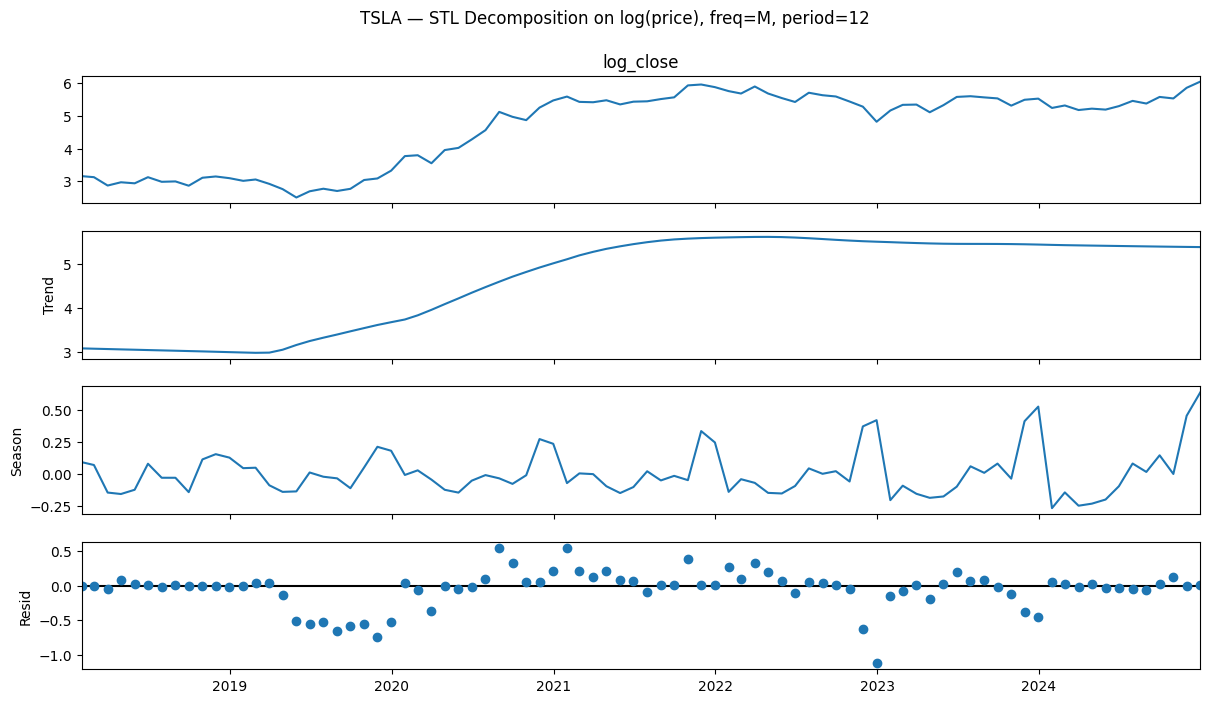

In [1]:
# %pip -q install yfinance statsmodels scikit-learn

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.tsa.seasonal import STL

plt.rcParams["figure.figsize"] = (12, 5)

symbol     = "TSLA"
start_date = "2018-01-01"
end_date   = "2024-12-31"

px = yf.download(symbol, start=start_date, end=end_date, auto_adjust=True)[["Close"]].dropna()
px.index = pd.to_datetime(px.index)

# ÏõîÎßê Î¶¨ÏÉòÌîå
freq   = "M"
period = 12
px_m = px.resample(freq).last().dropna()

# üîß Ïó¨Í∏∞Îßå Î∞îÍø®ÏäµÎãàÎã§
y_log = np.log(px_m["Close"].astype(float))
y_log.name = "log_close"

# STL Î∂ÑÌï¥
stl = STL(y_log, period=period, robust=True)
res = stl.fit()
trend, seasonal, resid = res.trend, res.seasonal, res.resid

fig = res.plot(); fig.set_size_inches(12, 7)
plt.suptitle(f"{symbol} ‚Äî STL Decomposition on log(price), freq={freq}, period={period}", y=1.02)
plt.show()




## 3) ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÎ¶¨(80/20)

* Ïõî Îã®ÏúÑ ÏãúÍ≥ÑÏó¥ÏùÑ ÏãúÍ∞ÑÏàúÏúºÎ°ú Î∂ÑÎ¶¨Ìï¥ÏÑú **Îç∞Ïù¥ÌÑ∞ ÎàÑÏàò Î∞©ÏßÄ**.

## 4) Íµ¨ÏÑ±ÏöîÏÜå ÏòàÏ∏°

* **Ï∂îÏÑ∏ (T)**: `LinearRegression`ÏúºÎ°ú ÏßÅÏÑ† Ï†ÅÌï© ‚Üí ÎØ∏Îûò (h)Í∞úÏõî Ïô∏ÏÇΩ.
* **Í≥ÑÏ†à (S)**: ÎßàÏßÄÎßâ 12Í∞úÏõî Í∞íÏùÑ **Ï∞®Î°ÄÎ°ú Î∞òÎ≥µ**.
  ÏãúÏûë ÏõîÏùÑ ÎßûÏ∂îÍ∏∞ ÏúÑÌï¥ `start_pos = (ÎßàÏßÄÎßâ ÌïôÏäµÏõî + 1) % 12`.
* **ÏûîÏ∞® (R)**: 0ÏúºÎ°ú Îë†(Í∞ÑÎã® Í∏∞Ï§Ä). *Í≥†ÎèÑÌôî Ïãú ARIMA/ETSÎ°ú Î™®Îç∏ÎßÅ Í∞ÄÎä•.*

## 5) Ìï©ÏÑ±¬∑Ïó≠Î≥ÄÌôò¬∑ÌèâÍ∞Ä

* $(\hat{\log y})$ = Ï∂îÏÑ∏ + Í≥ÑÏ†à ‚Üí `np.exp`Î°ú **Í∞ÄÍ≤©**ÏúºÎ°ú Î≥µÏõê.
* ÌÖåÏä§Ìä∏ Íµ¨Í∞ÑÏóêÏÑú **RMSE / MAE / R¬≤** Í≥ÑÏÇ∞.
* Ïã§Ï†ú vs ÏòàÏ∏° **Ïò§Î≤ÑÎ†àÏù¥ ÌîåÎ°Ø** Î∞è **STL Íµ¨ÏÑ±ÏöîÏÜå ÌîåÎ°Ø** Ï∂úÎ†•.



[Decomposition forecast] RMSE=605.8435 | MAE=556.4586 | R2=-98.1023


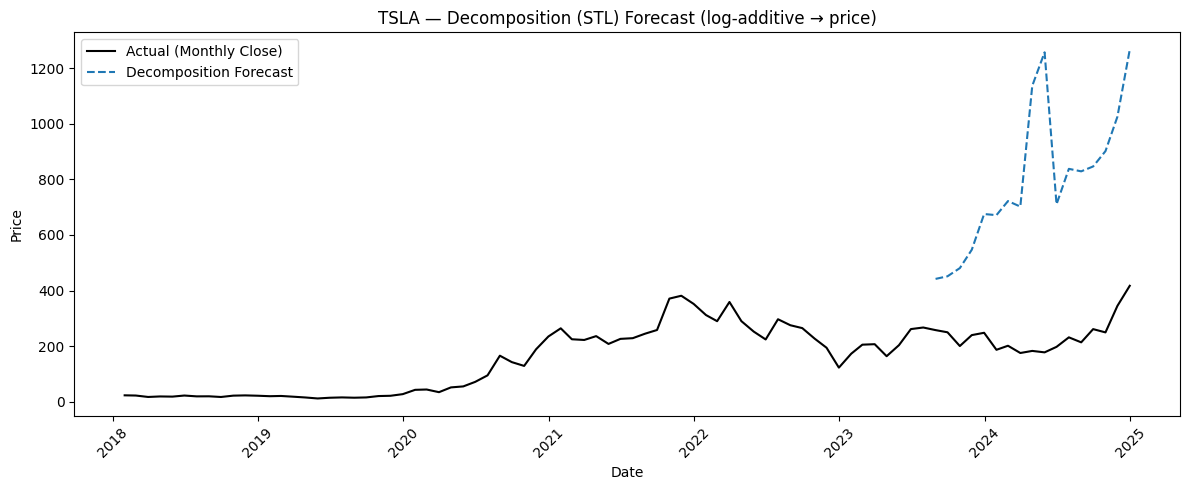

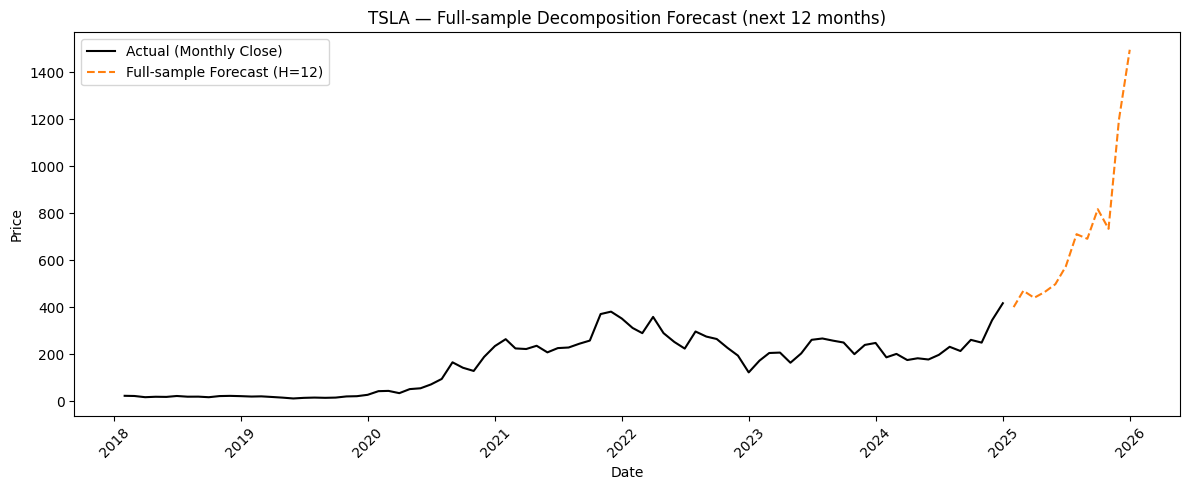

In [6]:
# -----------------------------
# 3) ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï† (80/20)
# -----------------------------
n = len(y_log)
split = int(n * 0.8)
y_train, y_test = y_log.iloc[:split], y_log.iloc[split:]
trend_train, seasonal_train = trend.iloc[:split], seasonal.iloc[:split]

dates_train = y_train.index
dates_test  = y_test.index

# -----------------------------
# 4) Í∞ÑÎã®Ìïú ÏòàÏ∏° Ï†ÑÎûµ
# (a) Ï∂îÏÑ∏: ÏÑ†ÌòïÌöåÍ∑ÄÎ°ú Ï∂îÏÑ∏ ÏÑ±Î∂Ñ Ïô∏ÏÇΩ
# (b) Í≥ÑÏ†àÏÑ±: ÌïôÏäµ Íµ¨Í∞ÑÏùò ÎßàÏßÄÎßâ 'period' Ìå®ÌÑ¥ Î∞òÎ≥µ
# ÏûîÏ∞®Îäî ÌèâÍ∑† 0 Í∞ÄÏ†ï
# -----------------------------

def forecast_trend_linear(trend_series, h):
    """Ï∂îÏÑ∏ ÏÑ±Î∂ÑÏùÑ ÏÑ†ÌòïÌöåÍ∑ÄÎ°ú Ïô∏ÏÇΩ."""
    t = np.arange(len(trend_series)).reshape(-1, 1)
    lr = LinearRegression().fit(t, trend_series.values)
    t_future = np.arange(len(trend_series), len(trend_series) + h).reshape(-1, 1)
    return lr.predict(t_future)

def repeat_last_season(seasonal_series, period, h, start_idx=0):
    """
    ÎßàÏßÄÎßâ 'period' Í≥ÑÏ†à Ìå®ÌÑ¥ÏùÑ Í∑∏ÎåÄÎ°ú Î∞òÎ≥µ.
    start_idx=0Ïù¥Î©¥ Î∞îÎ°ú Îã§Ïùå Ïä§ÌÖùÎ∂ÄÌÑ∞ pattern[0]Ïù¥ Î∞∞ÏπòÎê®.
    """
    if len(seasonal_series) < period:
        # Îç∞Ïù¥ÌÑ∞Í∞Ä ÏßßÏúºÎ©¥ ÌèâÍ∑†ÏπòÎ°ú ÎåÄÏ≤¥
        return np.full(h, seasonal_series.mean(), dtype=float)
    last = seasonal_series.values[-period:]
    out = np.empty(h, dtype=float)
    for i in range(h):
        out[i] = last[(start_idx + i) % period]
    return out

# ÌÖåÏä§Ìä∏ Íµ¨Í∞Ñ Í∏∏Ïù¥
h = len(y_test)

# (a) Ï∂îÏÑ∏ ÏòàÏ∏°
trend_fcst = forecast_trend_linear(trend_train, h)

# (b) Í≥ÑÏ†à ÏòàÏ∏° (Îã¨Î†• Ï†ïÎ†¨: ÌÖåÏä§Ìä∏ ÏãúÏûë Îã¨Ïùò "Í≥ÑÏ†à Ìè¨ÏßÄÏÖò" ÎßûÏ∂îÍ∏∞)
# ÌïôÏäµ Íµ¨Í∞ÑÏùò ÎßàÏßÄÎßâ Ïù∏Îç±Ïä§Í∞Ä seasonÏùò Ïñ¥ÎîîÏòÄÎäîÏßÄ Í≥ÑÏÇ∞
# ÏõîÎ≥Ñ(period=12) Í∞ÄÏ†ï: Ïõî Î≤àÌò∏Î•º Ïç®ÏÑú Ï†ïÎ†¨
def month_pos(idx): return idx.month - 1  # 0..11
start_pos = (month_pos(dates_train[-1]) + 1) % period
season_fcst = repeat_last_season(seasonal_train, period, h, start_idx=start_pos)

# (c) Î°úÍ∑∏ ÏòàÏ∏° = Ï∂îÏÑ∏ + Í≥ÑÏ†à (+ ÏûîÏ∞® 0)
log_fcst = trend_fcst + season_fcst

# (d) ÏõêÎã®ÏúÑ(Í∞ÄÍ≤©)Î°ú Î≥µÏõê
price_test = px_m["Close"].iloc[split:]
price_fcst = np.exp(log_fcst)

# -----------------------------
# 5) ÏÑ±Îä• ÌèâÍ∞Ä & ÏãúÍ∞ÅÌôî
# -----------------------------
rmse = np.sqrt(mean_squared_error(price_test.values, price_fcst))
mae  = mean_absolute_error(price_test.values, price_fcst)
r2   = r2_score(price_test.values, price_fcst)
print(f"[Decomposition forecast] RMSE={rmse:.4f} | MAE={mae:.4f} | R2={r2:.4f}")

plt.figure(figsize=(12,5))
plt.plot(px_m.index, px_m["Close"], label="Actual (Monthly Close)", color="black")
plt.plot(dates_test, price_fcst, label="Decomposition Forecast", linestyle="--", color="tab:blue")
plt.title(f"{symbol} ‚Äî Decomposition (STL) Forecast (log-additive ‚Üí price)")
plt.xlabel("Date"); plt.ylabel("Price"); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()

# -----------------------------
# 6) Full-sample ÏµúÏ¢Ö Ï†ÅÌï© ‚Üí ÎØ∏Îûò HÍ∞úÏõî ÏòàÏ∏°
# -----------------------------
H = 12  # Ïòà: 12Í∞úÏõî
stl_full = STL(y_log, period=period, robust=True).fit()
trend_full, seasonal_full = stl_full.trend, stl_full.seasonal

trend_future  = forecast_trend_linear(trend_full, H)

# ÎØ∏Îûò ÏãúÏûë Îã¨(ÌïôÏäµ ÎßàÏßÄÎßâ Îã¨ Îã§ÏùåÎã¨)Ïùò Í≥ÑÏ†à Ìè¨ÏßÄÏÖò
start_pos_full = (month_pos(y_log.index[-1]) + 1) % period
season_future = repeat_last_season(seasonal_full, period, H, start_idx=start_pos_full)

log_future = trend_future + season_future
price_future = np.exp(log_future)

future_idx = pd.date_range(y_log.index[-1] + pd.offsets.MonthEnd(1), periods=H, freq="ME")

plt.figure(figsize=(12,5))
plt.plot(px_m.index, px_m["Close"], label="Actual (Monthly Close)", color="black")
plt.plot(future_idx, price_future, label=f"Full-sample Forecast (H={H})", linestyle="--", color="tab:orange")
plt.title(f"{symbol} ‚Äî Full-sample Decomposition Forecast (next {H} months)")
plt.xlabel("Date"); plt.ylabel("Price"); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()



# ÌïµÏã¨ Ìï®Ïàò(ÏöîÏßÄ)

* `forecast_trend_linear`: Ï∂îÏÑ∏Ïóê **ÏßÅÏÑ†**ÏùÑ Ï†ÅÌï©Ìï¥ ÎØ∏Îûò $(h)$ Ïä§ÌÖù ÏòàÏ∏°.
* `repeat_last_season`: ÎßàÏßÄÎßâ **12Í∞úÏõî Í≥ÑÏ†àÌå®ÌÑ¥**ÏùÑ Í∑∏ÎåÄÎ°ú Î∞òÎ≥µ.
* (ÏÑ†ÌÉù) ÏûîÏ∞®Î•º Îî∞Î°ú Î™®Îç∏ÎßÅÌïòÎ©¥ Ï†ïÎ∞ÄÎèÑÍ∞Ä Îçî Ï¢ãÏïÑÏßà Ïàò ÏûàÏñ¥Ïöî.



# ÏûêÏ£º Î¨ªÎäî ÏßàÎ¨∏(FAQ)

**Q1. Í≥ÑÏ†àÏÑ±Ïù¥ ÏïΩÌïú Ï£ºÍ∞ÄÏóêÎèÑ Ïú†Ìö®ÌïúÍ∞ÄÏöî?**

* Í∞ïÌïú ‚ÄòÏ∫òÎ¶∞Îçî‚Äô Ìå®ÌÑ¥Ïù¥ ÏóÜÏùÑ Ïàò ÏûàÏñ¥ ÏÑ±Îä•Ïù¥ Ï†úÌïúÎê† Ïàò ÏûàÏäµÎãàÎã§. Í∑∏Îü¥ Îïê **STLÏùò trendÎßå Ïì∞Í≥† seasonalÏùÄ 0**ÏúºÎ°ú ÎëêÍ±∞ÎÇò, **ÏûîÏ∞®Ïóê ARIMA/SARIMA**Î•º ÏñπÏñ¥ Î≥¥ÏÑ∏Ïöî.

**Q2. ÏùºÎ¥âÏúºÎ°ú ÌïòÍ≥† Ïã∂Îã§Î©¥?**

* `period=5`(Ï£ºÏ§ë Í±∞ÎûòÏùº), ÎòêÎäî `B`(ÏòÅÏóÖÏùº) Í∏∞Ï§Ä. Îã§Îßå Ìú¥Ïû•/Ïù¥Î≤§Ìä∏Î°ú Ï£ºÍ∏∞ÏÑ±Ïù¥ ÌùîÎì§Î¶¥ Ïàò ÏûàÏñ¥ Ïõî/Ï£º Î¶¨ÏÉòÌîåÏù¥ ÏïàÏ†ïÏ†ÅÏûÖÎãàÎã§.

**Q3. Ïôú Î°úÍ∑∏Ïù∏Í∞ÄÏöî?**

* **Î≥ÄÎèôÏÑ± ÏïàÏ†ïÌôî**ÏôÄ **Í≥±ÏÖàÏ†Å Í≥ÑÏ†àÏÑ± ‚Üí Í∞ÄÎ≤ïÌôî** Ìö®Í≥º. ÏòàÏ∏° ÌõÑ `exp`Î°ú ÎêòÎèåÎ¶ΩÎãàÎã§.

**Q4. Îã®Ïàú Î∞òÎ≥µ ÎåÄÏã† Îçî ÎòëÎòëÌïú Í≥ÑÏ†à ÏòàÏ∏°ÏùÄ?**

* ÏµúÍ∑º Î™á ÎÖÑÏùò Í∞ôÏùÄ Îã¨ ÌèâÍ∑†, Holt-Winters(ETS)Ïùò Í≥ÑÏ†à ÏÑ±Î∂Ñ, ÎòêÎäî TBATS/Prophet Í∞ôÏùÄ Î∞©Î≤ïÏúºÎ°ú ÎåÄÏ≤¥ Í∞ÄÎä•Ìï©ÎãàÎã§.



# ÌôïÏû• ÏïÑÏù¥ÎîîÏñ¥

* **Fixed-origin / Rolling / Expanding** Î∞±ÌÖåÏä§Ìä∏Î°ú ÌèâÍ∞Ä(ÏõêÏ†ê Ïù¥Îèô).
* ÏûîÏ∞® $(R_t)$Î•º ARIMA/SARIMAÎ°ú ÏòàÏ∏°Ìï¥ $(\hat{T}+\hat{S}+\hat{R})$ Íµ¨ÏÑ±.
* **ÎπÑÏÑ†Ìòï Ï∂îÏÑ∏**$(spline/LOESS)$ Ïô∏ÏÇΩ, **Regressor**(Í±∞ÎûòÎüâ, Í∏àÎ¶¨ Îì±) Ï∂îÍ∞Ä.

# ÏàúÌôòÎ≥ÄÎèô Ìè¨Ìï® ÏöîÏÜåÎ∂ÑÌï¥

##  ÏòµÏÖò 1) Íµ¨Ï°∞Ï†Å ÏãúÍ≥ÑÏó¥(ÏÉÅÌÉúÍ≥µÍ∞Ñ) ‚Äì Unobserved ComponentsÏùò cycle ÏÇ¨Ïö©
statsmodelsÏùò UCMÏùÄ cycle ÏÑ±Î∂ÑÏùÑ ÎÇ¥Ïû•ÌïòÍ≥† ÏûàÏñ¥ STLÎ≥¥Îã§ ÏûêÏó∞Ïä§ÎüΩÍ≤å ÏàúÌôòÏùÑ Îã§Î£∏

In [9]:
# ============================================
# Colab Ï§ÄÎπÑ (ÌïÑÏöî Ïãú)
# ============================================
# %pip -q install yfinance statsmodels scikit-learn

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.structural import UnobservedComponents
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.ar_model import AutoReg

plt.rcParams["figure.figsize"] = (12, 5)

# ============================================
# 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú ‚Üí ÏõîÎßê Ï¢ÖÍ∞Ä ‚Üí Î°úÍ∑∏ Î≥ÄÌôò
# ============================================
symbol     = "TSLA"
start_date = "2016-01-01"
end_date   = "2024-12-31"

# auto_adjust=True: Î∞∞Îãπ/Ïï°Î©¥ Îì± Ï°∞Ï†ïÎ∞òÏòÅ
px_d = yf.download(symbol, start=start_date, end=end_date, auto_adjust=True)[["Close"]].dropna()
px_d.index = pd.to_datetime(px_d.index)

# ÏõîÎßê(MonthEnd)Î°ú ÏßëÍ≥Ñ: ÎßàÏßÄÎßâ ÏòÅÏóÖÏùº Ï¢ÖÍ∞Ä
px_m = px_d.resample("ME").last().dropna()

# ‚úÖ Ìï≠ÏÉÅ SeriesÎ°ú Í∞ïÏ†ú(squeeze) ‚Üí Ïù¥Î¶Ñ ÏÑ§Ï†ï ÌõÑ Î°úÍ∑∏
close_s = px_m["Close"]
if isinstance(close_s, pd.DataFrame):   # 1Ïó¥ DFÎ°ú Ïò§Îäî Í≤ΩÏö∞ Î∞©ÏßÄ
    close_s = close_s.squeeze("columns")
close_s = pd.to_numeric(close_s, errors="coerce").dropna()
close_s.name = "close"

y_log = np.log(close_s)
y_log.name = "log_close"

dates = y_log.index
print(f"{symbol}: {len(y_log)} monthly obs | {dates[0].date()} ~ {dates[-1].date()}")


# ÏòàÏ∏° Í∏∏Ïù¥ (Í∞úÏõî)
H = 12

[*********************100%***********************]  1 of 1 completed

TSLA: 108 monthly obs | 2016-01-31 ~ 2024-12-31


                            Unobserved Components Results                            
Dep. Variable:                     log_close   No. Observations:                  108
Model:                    local linear trend   Log Likelihood                  15.522
                   + stochastic seasonal(12)   AIC                            -17.044
                   + damped stochastic cycle   BIC                              0.684
Date:                       Wed, 08 Oct 2025   HQIC                            -9.886
Time:                               10:01:10                                         
Sample:                           01-31-2016                                         
                                - 12-31-2024                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

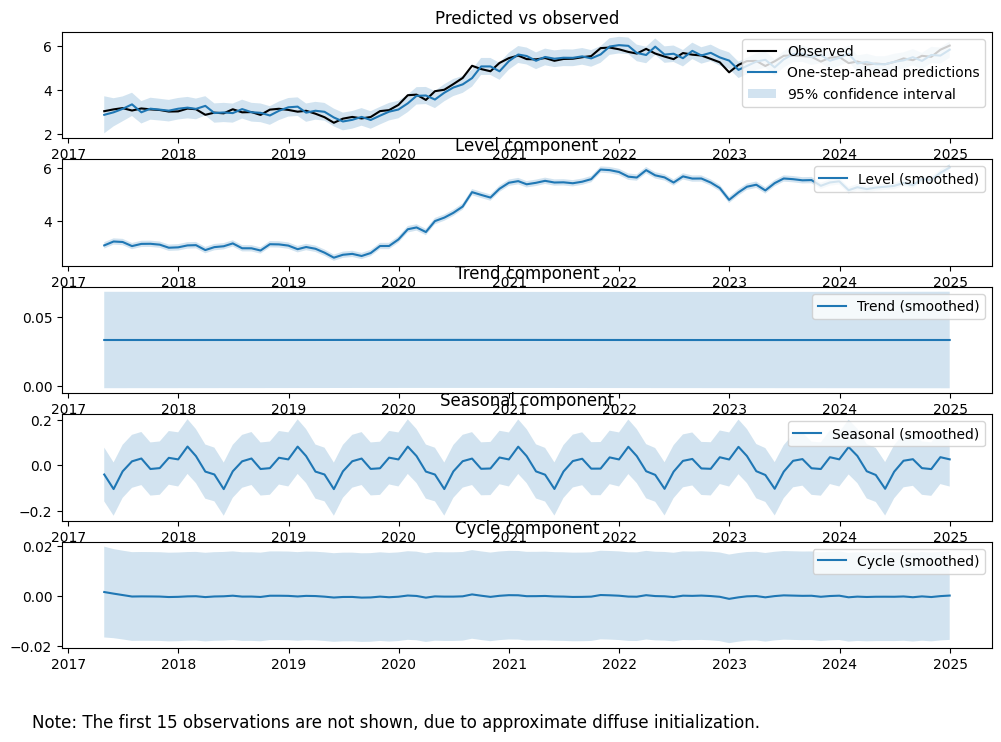

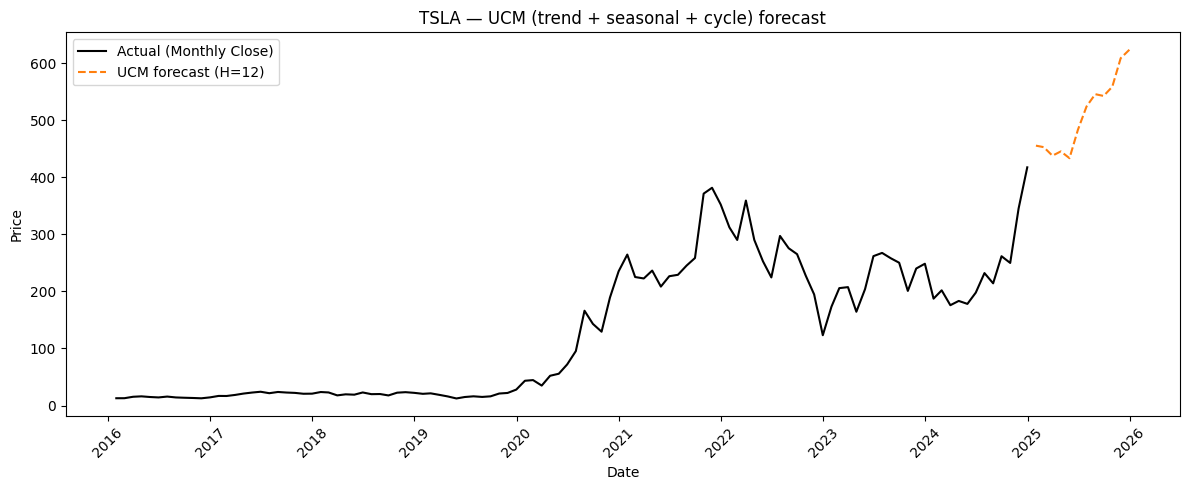

In [10]:
# ============================================
# 2) Unobserved Components (UCM): level + seasonal(12) + cycle
# ============================================
ucm = UnobservedComponents(
    y_log,
    level="local linear trend",   # Î°úÏª¨ ÏÑ†ÌòïÏ∂îÏÑ∏
    seasonal=12,                  # ÏõîÎ≥Ñ Í≥ÑÏ†àÏÑ±
    cycle=True,                   # ÏàúÌôò ÏÑ±Î∂Ñ
    damped_cycle=True,            # Í∞êÏá† ÌóàÏö©
    stochastic_cycle=True         # ÌôïÎ•†Ï†Å ÏàúÌôò
)
res_ucm = ucm.fit(disp=False)

print(res_ucm.summary())

# (ÏÑ†ÌÉù) Íµ¨ÏÑ±ÏöîÏÜå ÏãúÍ∞ÅÌôî
res_ucm.plot_components(legend_loc="upper right", figsize=(12, 8));

# ÏÑ±Î∂Ñ ÏãúÍ≥ÑÏó¥ Ï∂îÏ∂ú(Í∞ÄÎä•Ìïú Í≤ΩÏö∞)
def get_ucm_components(res, index):
    comps = {}
    for name in ["level", "trend", "seasonal", "cycle"]:
        attr = f"{name}_smoothed"
        if hasattr(res, attr):
            arr = getattr(res, attr)
            comps[name] = pd.Series(np.asarray(arr).ravel(), index=index, name=name)
    return comps

ucm_comps = get_ucm_components(res_ucm, y_log.index)

# UCM ÏòàÏ∏° (HÍ∞úÏõî)
pred_ucm = res_ucm.get_forecast(steps=H)
log_future_ucm = pred_ucm.predicted_mean
price_future_ucm = np.exp(log_future_ucm)

future_idx = pd.date_range(y_log.index[-1] + pd.offsets.MonthEnd(1), periods=H, freq="ME")

plt.figure()
plt.plot(px_m.index, px_m["Close"], label="Actual (Monthly Close)", color="black")
plt.plot(future_idx, price_future_ucm, label=f"UCM forecast (H={H})", linestyle="--", color="tab:orange")
plt.title(f"{symbol} ‚Äî UCM (trend + seasonal + cycle) forecast")
plt.xlabel("Date"); plt.ylabel("Price"); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()


## ÏòµÏÖò 2) STL + HP ÌïÑÌÑ∞(ÎòêÎäî Î∞¥ÎìúÌå®Ïä§)Î°ú ÏàúÌôòÎßå Ï∂îÍ∞Ä Î∂ÑÎ¶¨

STLÎ°ú Ï∂îÏÑ∏+Í≥ÑÏ†àÏùÑ Î∫Ä Îí§, ÎÇ®ÏùÄ Î∂ÄÎ∂ÑÏóêÏÑú Ïû•Ï£ºÍ∏∞ ÏÑ±Î∂ÑÎßå Îî∞Î°ú Ï∂îÏ∂úÌï©ÎãàÎã§.

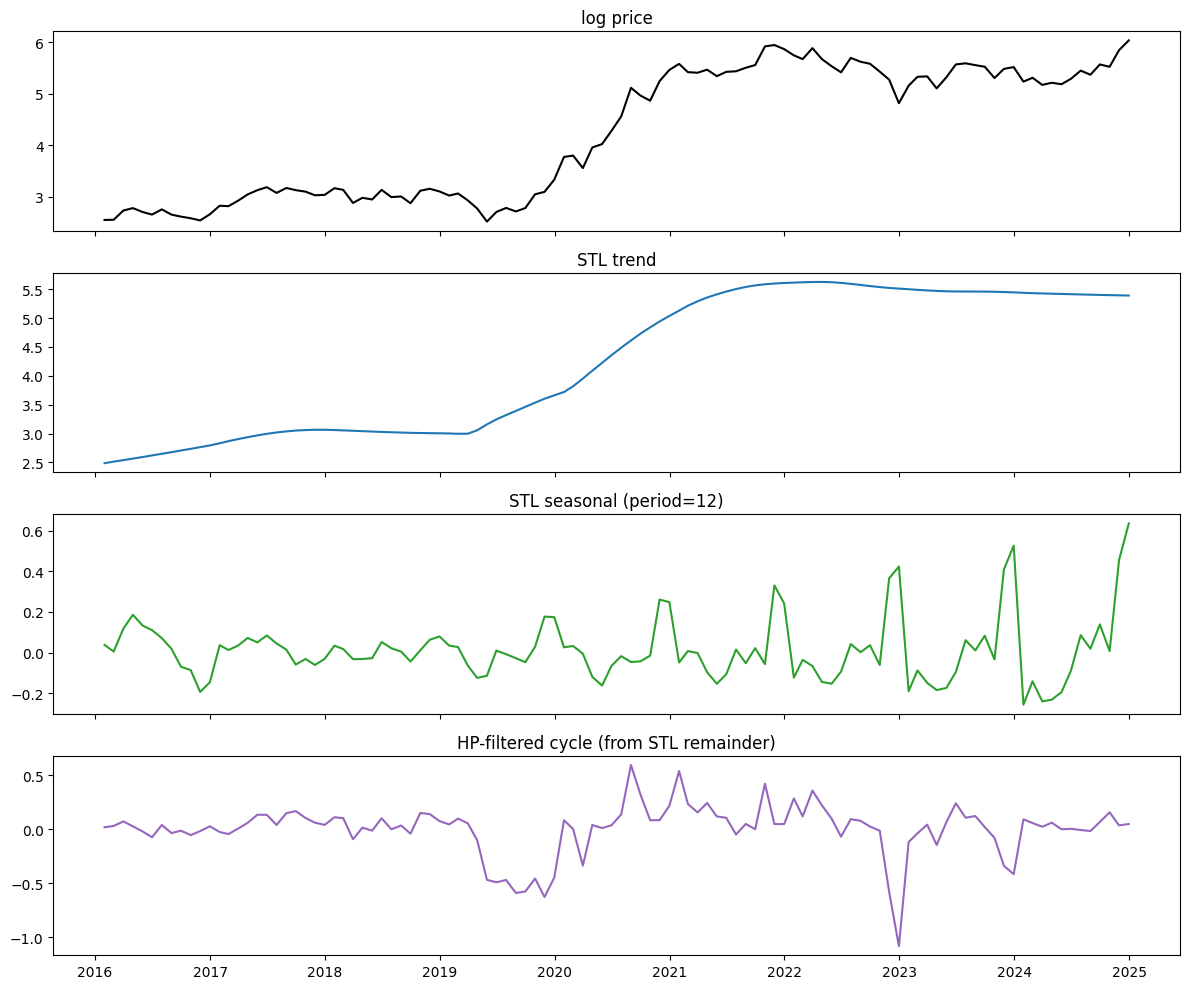

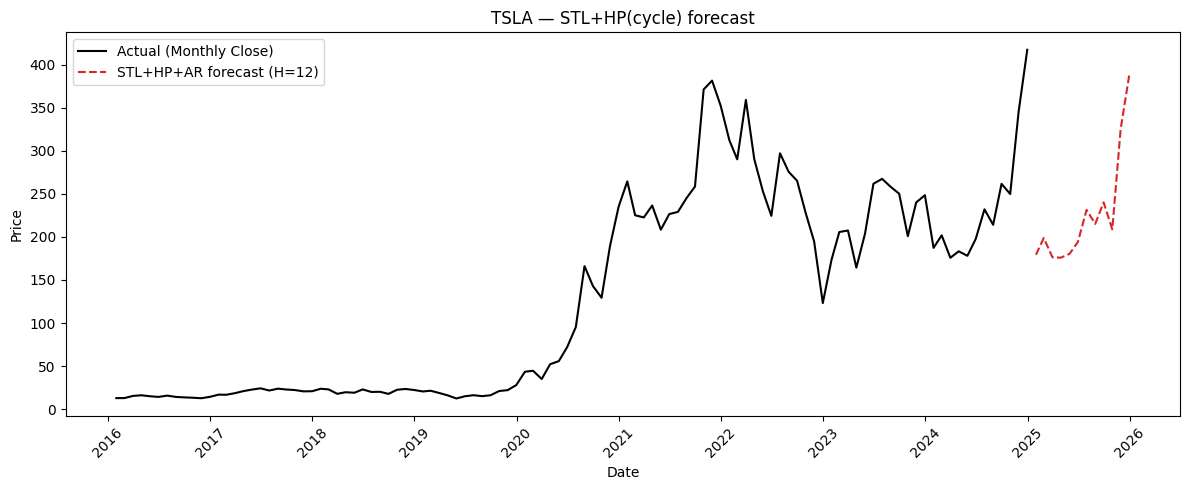

In [12]:
# ============================================
# 3) STL Î∂ÑÌï¥ (additive on log) ‚Üí remainderÏóêÏÑú HPÌïÑÌÑ∞Î°ú 'cycle' Ï∂îÏ∂ú
# ============================================
stl = STL(y_log, period=12, robust=True)
stl_res = stl.fit()
trend_stl = stl_res.trend
season_stl = stl_res.seasonal
rem_stl = y_log - trend_stl - season_stl

# HP ÌïÑÌÑ∞: ÏõîÎ≥Ñ ÎûåÎã§ ‚âà 129600 Í∂åÏû•
cycle_hp, trend_hp = hpfilter(rem_stl, lamb=129600)

# Íµ¨ÏÑ±ÏöîÏÜå ÌîåÎ°Ø
fig, ax = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
ax[0].plot(y_log, color="black"); ax[0].set_title("log price")
ax[1].plot(trend_stl, color="tab:blue"); ax[1].set_title("STL trend")
ax[2].plot(season_stl, color="tab:green"); ax[2].set_title("STL seasonal (period=12)")
ax[3].plot(cycle_hp, color="tab:purple"); ax[3].set_title("HP-filtered cycle (from STL remainder)")
plt.tight_layout(); plt.show()

# ============================================
# 4) Í∞ÑÎã® ÏòàÏ∏°:
# - Ï∂îÏÑ∏: ÏßÅÏÑ†(ÏµúÍ∑º Íµ¨Í∞Ñ) Ïô∏ÏÇΩ
# - Í≥ÑÏ†à: 'ÏõîÎ≤àÌò∏'Î≥Ñ ÏµúÍ∑º ÏãúÏ¶å Í∞í Î∞òÎ≥µ
# - ÏàúÌôò: AR Î™®Îç∏Î°ú H-step forecast
# ============================================
# (a) Ï∂îÏÑ∏ ÏÑ†Ìòï Ïô∏ÏÇΩ (ÎßàÏßÄÎßâ 36Í∞úÏõîÎ°ú Í∏∞Ïö∏Í∏∞ Ï∂îÏ†ï)
use_n = min(24, len(trend_stl))
x = np.arange(use_n, dtype=float)
y = trend_stl.iloc[-use_n:].to_numpy(dtype=float)

coef = np.polyfit(x, y, 1)
slope = float(coef[0])
# ÎßàÏßÄÎßâ Ï†êÏùò xÍ∞íÏùÄ use_n-1Ïù¥ÎØÄÎ°ú, y_last = slope*(use_n-1) + intercept
intercept = float(trend_stl.iloc[-1]) - slope * (use_n - 1)

# Îã§Ïùå HÍ∞úÏõî Ìä∏Î†åÎìú (ÎßàÏßÄÎßâ ÏãúÏ†ê Ïù¥ÌõÑ 1,2,...H Ïä§ÌÖù)
trend_future = trend_stl.iloc[-1] + slope * np.arange(1, H + 1, dtype=float)
# ÎòêÎäî Ï†àÎåÄ xÏ¢åÌëúÎ°ú Í≥ÑÏÇ∞ÌïòÎ†§Î©¥:
# x_fore = np.arange(use_n, use_n + H, dtype=float)
# trend_future = slope * x_fore + intercept
# (b) Í≥ÑÏ†à Î∞òÎ≥µ: 'ÏõîÎ≤àÌò∏Î≥Ñ' ÎßàÏßÄÎßâ Í≥ÑÏ†àÍ∞í ÏÇ¨Ï†Ñ ‚Üí Îã§Ïùå HÍ∞úÏõîÏóê Îß§Ìïë
season_last_by_month = (
    pd.Series(season_stl.values, index=y_log.index.month)
      .groupby(level=0).last()
)
next_months = ((y_log.index[-1].month + np.arange(1, H+1) - 1) % 12) + 1
season_future = season_last_by_month.reindex(next_months).to_numpy()

# (c) ÏàúÌôò ÏòàÏ∏°: AutoReg(12) (ÏõîÏ£ºÍ∏∞)
cycle_series = cycle_hp.dropna().astype(float)
lags = min(12, max(1, len(cycle_series)//10))  # ÏûêÎ£å Í∏∏Ïù¥Ïóê Îî∞Îùº Î≥¥ÏàòÏ†Å ÏÑ§Ï†ï
ar_fit = AutoReg(cycle_series, lags=lags, old_names=False).fit()
cycle_future = ar_fit.forecast(H).to_numpy()

# (d) Ìï©ÏÇ∞ ‚Üí Î°úÍ∑∏‚ÜíÎ†àÎ≤®
log_future_stl = trend_future + season_future + cycle_future
price_future_stl = np.exp(log_future_stl)

plt.figure()
plt.plot(px_m.index, px_m["Close"], label="Actual (Monthly Close)", color="black")
plt.plot(future_idx, price_future_stl, label=f"STL+HP+AR forecast (H={H})", linestyle="--", color="tab:red")
plt.title(f"{symbol} ‚Äî STL+HP(cycle) forecast")
plt.xlabel("Date"); plt.ylabel("Price"); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()


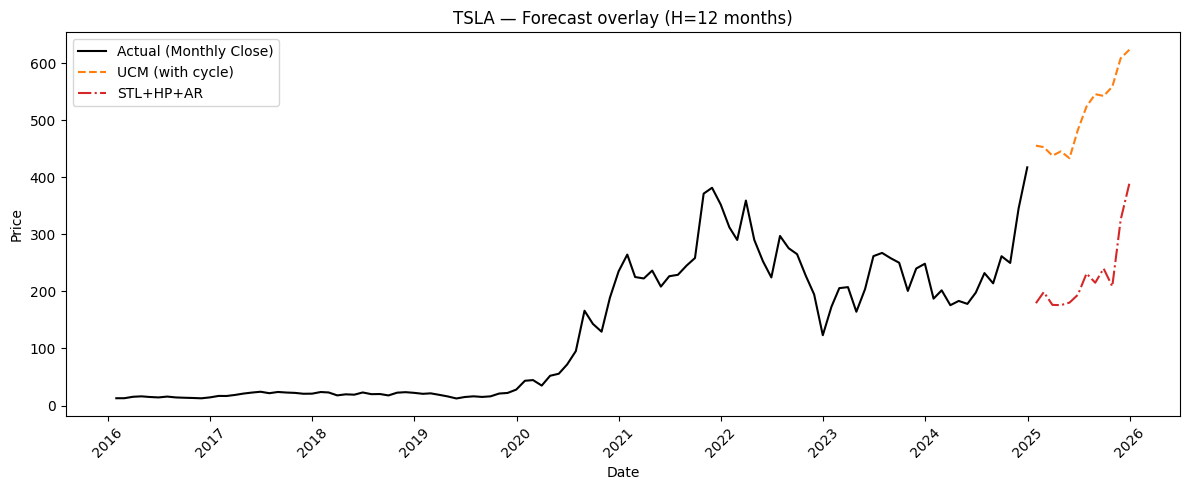

In [13]:
plt.figure()
plt.plot(px_m.index, px_m["Close"], label="Actual (Monthly Close)", color="black", linewidth=1.5)
plt.plot(future_idx, price_future_ucm, label="UCM (with cycle)", linestyle="--", color="tab:orange")
plt.plot(future_idx, price_future_stl, label="STL+HP+AR", linestyle="-.", color="tab:red")
plt.title(f"{symbol} ‚Äî Forecast overlay (H={H} months)")
plt.xlabel("Date"); plt.ylabel("Price"); plt.xticks(rotation=45); plt.legend(); plt.tight_layout(); plt.show()


# HP(Hodrick‚ÄìPrescott) ÌïÑÌÑ∞
HP(Hodrick‚ÄìPrescott) ÌïÑÌÑ∞Îäî **ÏöîÏÜå Î∂ÑÌï¥(decomposition)**Ïùò Ìïú Î∞©Î≤ï.

ÏãúÍ≥ÑÏó¥ (Y_t)Î•º


$$ Y_t = T_t + C_t$$


Î°ú ÎÇòÎàÑÎäîÎç∞, Ïó¨Í∏∞ÏÑú

* $(T_t)$: **Îß§ÎÅàÌïú Ïû•Í∏∞ Ï∂îÏÑ∏(trend)**
* $(C_t)$: **Ï∂îÏÑ∏ÏóêÏÑúÏùò ÏùºÏãúÏ†Å Ìé∏Ï∞®(‚Äúcycle‚ÄùÏù¥Îùº Î∂ÄÎ•¥ÏßÄÎßå, Íº≠ Ï£ºÍ∏∞Ï†ÅÏùº ÌïÑÏöîÎäî ÏóÜÏùå)**

ÏùÑ ÎúªÌï®.
Í≥ÑÏ†àÏÑ±ÏùÄ **Ìè¨Ìï®ÌïòÏßÄ ÏïäÏùå**(STLÏ≤òÎüº $(+S_t)$Í∞Ä ÏûàÎäî Íµ¨Ï°∞Í∞Ä ÏïÑÎãò).


# Ïñ¥ÎñªÍ≤å Ï∂îÏÑ∏Î•º Íµ¨ÌïòÎÇòÏöî?

HP ÌïÑÌÑ∞Îäî ‚Äú**ÎÑàÎ¨¥ Ï∂úÎ†ÅÏù¥ÏßÄ ÏïäÎäî**‚Äù Ï∂îÏÑ∏ $(T_t)$Î•º Ï∞æÍ∏∞ ÏúÑÌï¥ ÏïÑÎûòÏùò **Î≤åÏ†ê ÏµúÏÜåÌôî** Î¨∏Ï†úÎ•º ÌíâÎãàÎã§.


$$\min_{{T_t}}  \sum_{t=1}^{T} (Y_t - T_t)^2 + \lambda \sum_{t=3}^{T} \big[(T_t - T_{t-1}) - (T_{t-1} - T_{t-2})\big]^2 .$$


* Ï≤´ Ìï≠: $(Y_t)$ÏôÄ Ï∂îÏÑ∏ $(T_t)$Ïùò **Í∑ºÏ†ëÏÑ±**(Ï†ÅÌï©ÎèÑ)
* ÎëòÏß∏ Ìï≠: $(T_t)$Ïùò **Í≥°Î•†(2Ï∞® Ï∞®Î∂Ñ)**Ïóê ÎåÄÌïú Î≤åÏ†ê ‚Üí $(T_t)$Í∞Ä ÎÑàÎ¨¥ ÌúòÏßÄ ÏïäÎèÑÎ°ù **Îß§ÎÅàÌïòÍ≤å** ÎßåÎì≠ÎãàÎã§.
* $(\lambda)$: **Ïä§Î¨¥Îî© Í∞ïÎèÑ**. $(\lambda)$Í∞Ä ÌÅ¥ÏàòÎ°ù Ï∂îÏÑ∏Í∞Ä Îçî Îß§ÎÅà(Î≥ÄÌôî ÎëîÍ∞ê), ÏûëÏùÑÏàòÎ°ù Ïõê ÏûêÎ£åÎ•º Îçî Ïûò Îî∞ÎùºÍ∞ê.

### $(\lambda)$ ÏÑ†ÌÉù(Í¥ÄÌñâ)

* **Î∂ÑÍ∏∞ ÏûêÎ£å**: $(\lambda = 1600)$ (Í∞ÄÏû• Ïú†Î™Ö)
* **ÏõîÎ≥Ñ ÏûêÎ£å**: $(\lambda \approx 129{,}600)$
* **Ïó∞Í∞Ñ ÏûêÎ£å**: $(\lambda \approx 6.25)$

> ÏúÑ ÏàòÏπòÎäî Ravn & Uhlig(2002)Ïùò Ïä§ÏºÄÏùºÎßÅ Í∑úÏπô$((\lambda \propto f^4))$ÏùÑ Îî∞Î•∏ Í∞íÏûÖÎãàÎã§.
> Î¨∏ÌóåÏóê Îî∞Îùº Ïó∞Í∞Ñ 100ÏùÑ Ïì∞Îäî ÏòàÎèÑ ÏûàÏúºÎãà, Îç∞Ïù¥ÌÑ∞ ÏÑ±Í≤©Ïóê ÎßûÍ≤å ÌäúÎãùÌïòÏÑ∏Ïöî.



# Ìï¥ÏÑù Ìè¨Ïù∏Ìä∏

* $(C_t = Y_t - T_t)$Îäî **‚ÄúÏàúÌôò/Í≤ΩÍ∏∞Î≥ÄÎèô(combined cycle)‚Äù**Ïù¥Îùº Î∂ÄÎ•¥ÏßÄÎßå, **Ï†ïÌôïÌûà Ï£ºÍ∏∞Ï†Å(sinusoidal)**Ïùº ÌïÑÏöîÎäî ÏóÜÏäµÎãàÎã§.
  Í∏àÏúµ ÏãúÍ≥ÑÏó¥ÏóêÏÑúÎäî ‚Äú**Îã®Í∏∞ Î≥ÄÎèô(ÏûîÏ∞®)‚Äù**Ïóê Îçî Í∞ÄÍπùÍ≤å Ïù¥Ìï¥ÎêòÎäî Í≤ΩÏö∞Í∞Ä ÎßéÏïÑÏöî.
* **ÎÅùÏ†ê Ìé∏Ìñ•(end-point bias)**: ÏñëÏ™Ω ÎÅùÏóêÏÑúÎäî ÎØ∏Îûò/Í≥ºÍ±∞ Ï†ïÎ≥¥Í∞Ä Î∂ÄÏ°±Ìï¥ Ï∂îÏÑ∏ Ï∂îÏ†ïÏù¥ ÌùîÎì§Î¶ΩÎãàÎã§.
  Ïã§ÏãúÍ∞Ñ Î∂ÑÏÑùÏùÄ **ÏùºÎ∞©(1-sided) HP**ÎÇò Î°§ÎßÅ Ïû¨Ï†ÅÌï©ÏùÑ Í≥†Î†§ÌïòÏÑ∏Ïöî.
* **Î™®Ìòï Í∏∞Î∞òÏù¥ ÏïÑÎãò**: HPÎäî ÏÉÅÌÉúÍ≥µÍ∞Ñ/ÌôïÎ•†Î™®ÌòïÏù¥ ÏïÑÎãàÎùº **Ïä§Î¨¥Îî© ÏµúÏ†ÅÌôî**ÎùºÏÑú,
  **(\lambda)** ÏÑ§Ï†ïÏóê Îî∞Îùº Î™®ÏñëÏù¥ ÍΩ§ Îã¨ÎùºÏßÄÍ≥†, **Í∞ÄÏßú ÏàúÌôò(spurious cycles)** ÏúÑÌóòÎèÑ ÏûàÏäµÎãàÎã§.



# Îã§Î•∏ Î∂ÑÌï¥Î≤ïÍ≥º ÎπÑÍµê

* **STL/ÌÅ¥ÎûòÏãù Î∂ÑÌï¥**: $(Y_t = T_t + S_t + R_t)$ (Ï∂îÏÑ∏ + Í≥ÑÏ†à + ÏûîÏ∞®). **Í≥ÑÏ†àÏÑ±**Ïù¥ ÌïµÏã¨.
  HPÎäî $(S_t)$Í∞Ä ÏóÜÍ≥† **Ï∂îÏÑ∏/Ìé∏Ï∞® 2Î∂ÑÌï¥**Îßå Ìï®.
* **Ïù¥ÎèôÌèâÍ∑†/Î°úÏö∞Ìå®Ïä§**: Îã®Ïàú Ïä§Î¨¥Îî©. HPÎäî **Í≥°Î•† Î≤åÏ†ê**ÏùÑ ÌÜµÌïú **ÏµúÏ†ÅÌôî Í∏∞Î∞ò Ïä§Î¨¥Îî©**.
* **ÏπºÎßåÌïÑÌÑ∞(Î°úÏª¨ Î†àÎ≤®/Î°úÏª¨ Ìä∏Î†åÎìú)**: ÏÉÅÌÉúÍ≥µÍ∞Ñ **ÌôïÎ•†Î™®Ìòï**. HPÎäî ÌäπÏ†ï Ïã†Ìò∏‚ÄìÏû°ÏùåÎπÑÎ•º Îëî Î≤†Ïù¥ÏßÄÏïà Ï∂îÏ†ïÍ≥º **ÎèôÏπò**Í∞Ä ÏÑ±Î¶ΩÌïòÍ∏∞ÎèÑ ÌïòÏßÄÎßå(ÌäπÏ†ï Í∞ÄÏ†ïÌïò), ÏùºÎ∞òÏ†ÅÏúºÎ°úÎäî **Î™®Ìòï ÏûêÏú†ÎèÑ**Í∞Ä Îçî ÎÇÆÏäµÎãàÎã§.



# Ïñ∏Ï†ú Ïì∞ÎÇò?

* **Í≤ΩÍ∏∞ÏàúÌôò Ï∂îÏ†ï(Í±∞ÏãúÍ≤ΩÏ†ú)**: Ïû•Í∏∞ Ï∂îÏÑ∏ÏôÄ Îã®Í∏∞ Ìé∏Ï∞®Î•º Î∂ÑÎ¶¨Ìï† Îïå Í∞ÑÌé∏.
* **Í≥ÑÏ†àÏÑ±Ïù¥ ÏïΩÌïòÍ±∞ÎÇò ÎØ∏Î¶¨ Ï†úÍ±∞Îêú Îç∞Ïù¥ÌÑ∞**ÏóêÏÑú Ïû•Í∏∞ ÌùêÎ¶ÑÏùÑ Î≥¥Í≥† Ïã∂ÏùÑ Îïå.
* **Í∏àÏúµ Î†àÎ≤® ÏûêÎ£å**(Í∞ÄÍ≤©)Î≥¥Îã§Îäî **ÏàòÏùµÎ•†**Ïù¥ÎÇò **ÎπÑÍ≥ÑÏ†à ÏûêÎ£å**ÏóêÏÑú ÏïàÏ†ïÏ†Å.



# Îπ†Î•∏ ÏÇ¨Ïö© Ïòà

**Python (statsmodels)**

```python
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter

# y: pandas Series (ÏõîÎ≥ÑÏù¥Î©¥ Œª‚âà129600, Î∂ÑÍ∏∞Î©¥ 1600)
cycle, trend = hpfilter(y, lamb=129600)
# y = trend + cycle
```

**R (mFilter)**

```r
library(mFilter)
hp <- hpfilter(y, freq = 129600)  # monthly
trend <- hp$trend
cycle <- hp$cycle
```



# Ìïú Ï§Ñ ÏöîÏïΩ

HP ÌïÑÌÑ∞Îäî $(Y_t = T_t + C_t)$Î°ú **Ï∂îÏÑ∏/Ìé∏Ï∞®**Î•º Í∞ÄÎ•¥Îäî **Ïä§Î¨¥Îî© Í∏∞Î∞ò Î∂ÑÌï¥Î≤ï**ÏûÖÎãàÎã§.
$(\lambda)$Î°ú Ï∂îÏÑ∏Ïùò Îß§ÎÅàÌï®ÏùÑ Ï°∞Ï†àÌïòÎ©∞, **Í≥ÑÏ†àÏÑ±ÏùÄ Îã§Î£®ÏßÄ ÏïäÏäµÎãàÎã§**.
ÎÅùÏ†ê Ìé∏Ìñ•Í≥º ($\lambda)$ ÎØºÍ∞êÎèÑÎ•º Ïú†ÎÖêÌï¥ ÏÇ¨Ïö©ÌïòÏãúÎ©¥ Îê©ÎãàÎã§.


[*********************100%***********************]  1 of 1 completed


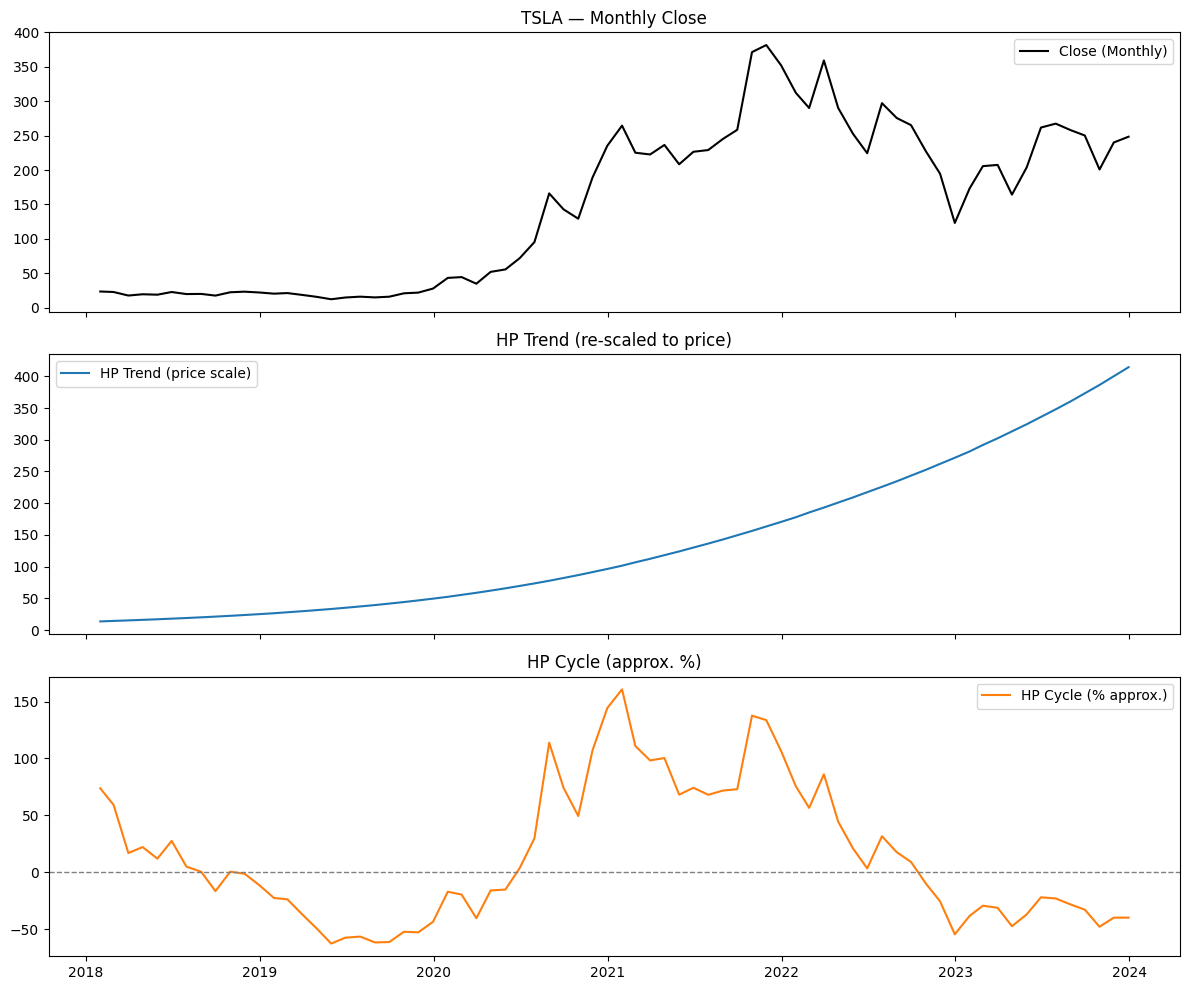

In [15]:
# ============================================
# Colab Ï§ÄÎπÑ (ÌïÑÏöîÌï† ÎïåÎßå)
# ============================================
# %pip -q install yfinance statsmodels matplotlib pandas

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter

plt.rcParams["figure.figsize"] = (12, 5)

# ============================================
# 1) Îç∞Ïù¥ÌÑ∞: TSLA ÏùºÎ≥Ñ ‚Üí ÏõîÎßê Ï¢ÖÍ∞ÄÎ°ú ÏßëÍ≥Ñ
# ============================================
symbol     = "TSLA"
start_date = "2018-01-01"
end_date   = "2024-01-01"

px_d = yf.download(symbol, start=start_date, end=end_date, auto_adjust=True)
px_d = px_d[["Close"]].dropna()

# ÏõîÎßê(MonthEnd) ÏßëÍ≥Ñ (ÎßàÏßÄÎßâ ÏòÅÏóÖÏùº Ï¢ÖÍ∞Ä)
px_m = px_d.resample("ME").last().dropna()
# ‚úÖ Ïó¨Í∏∞ Í≥†Ïπ®: Ïù¥Î¶Ñ Î∞îÍæ∏Î†§Î©¥ name ÏÜçÏÑ±ÏúºÎ°ú!
y = px_m["Close"].astype(float).copy()
y.name = "close"
y_log = np.log(y)   # HPÎäî Í∞ÄÎ≤ï Î™®Ìòï ‚Üí Î°úÍ∑∏Î°ú Î≥ÄÌôòÌï¥ 'Ï§Ä Í≥±ÏÖàÌòï' Í≥ÑÏ†à/Î≥ÄÎèôÏùÑ Í∞ÄÎ≤ïÌôî

# ============================================
# 2) HP ÌïÑÌÑ∞ Î∂ÑÌï¥ (ÏõîÎ≥Ñ Œª=129,600 Í∂åÏû•)
# ============================================
LAMBDA_MONTHLY = 129_600
cycle, trend = hpfilter(y_log, lamb=LAMBDA_MONTHLY)

# Í∞ÄÍ≤© Ïä§ÏºÄÏùºÎ°ú Î≥µÏõê
trend_price = np.exp(trend)
# ÏàúÌôò ÏÑ±Î∂ÑÏùÑ %Î°ú Í∞ÄÎèÖÌôî (ÎåÄÎûµÏ†ÅÏù∏ Í∑ºÏÇ¨)
cycle_pct = (np.exp(cycle) - 1.0) * 100.0

# ============================================
# 3) ÏãúÍ∞ÅÌôî
# ============================================
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

axes[0].plot(y.index, y.values, color="black", label="Close (Monthly)")
axes[0].set_title(f"{symbol} ‚Äî Monthly Close")
axes[0].legend()

axes[1].plot(y.index, trend_price.values, color="tab:blue", label="HP Trend (price scale)")
axes[1].set_title("HP Trend (re-scaled to price)")
axes[1].legend()

axes[2].plot(y.index, cycle_pct.values, color="tab:orange", label="HP Cycle (% approx.)")
axes[2].axhline(0, color="gray", linewidth=1, linestyle="--")
axes[2].set_title("HP Cycle (approx. %)")
axes[2].legend()

plt.tight_layout()
plt.show()

# ============================================
# 4) Ï∞∏Í≥†: Ï£ºÎ≥Ñ/ÏùºÎ≥Ñ ŒªÎ•º Ïì∞Í≥† Ïã∂Îã§Î©¥ (ÎπÑÍ∂åÏû•, Ï∞∏Í≥†Ïö©)
#    Œª_weekly ‚âà 129,600 * (52/12)^4  ‚âà 4.57e7
#    Œª_daily  ‚âà 129,600 * (365/12)^4 ‚â´ 1e10 (Îß§Ïö∞ ÌÅº)
# ============================================


# Í∞ÄÎ≤ï(additive) vs ÏäπÎ≤ï(multiplicative)

Î°úÍ∑∏ Î≥ÄÌôòÏúºÎ°ú ÏäπÎ≤ï(multiplicative)ÏùÑ Í∞ÄÎ≤ï(additive)ÏúºÎ°ú Î∞îÍøà



## ÌïµÏã¨ ÏõêÎ¶¨

Î°úÍ∑∏Ïùò Í∏∞Î≥∏ ÏÑ±Ïßà ÎïåÎ¨∏Ïóê

$$\log(ab)=\log a+\log b,\quad \log(abc)=\log a+\log b+\log c$$

Í∞Ä Îê©ÎãàÎã§.
Í∑∏ÎûòÏÑú ÏäπÎ≤ï Î∂ÑÌï¥

$$y_t = T_t \times S_t \times R_t$$

Ïóê Î°úÍ∑∏Î•º Ï∑®ÌïòÎ©¥

$$\log y_t=\log T_t+\log S_t+\log R_t$$

Ï≤òÎüº **Ìï©(Í∞ÄÎ≤ï)** ÌòïÌÉúÎ°ú Î∞îÎÄåÏ£†. STLÏùÄ ÏõêÎûò Í∞ÄÎ≤ï Î™®ÌòïÏù¥ÎØÄÎ°ú, Î°úÍ∑∏Î•º Ï∑®Ìï¥ Í∞ÄÎ≤ïÏúºÎ°ú ÎßåÎì† Îí§ Î∂ÑÌï¥ÌïòÍ≥†, ÌïÑÏöîÌïòÎ©¥ $(\exp(\cdot))$Î°ú Îã§Ïãú ÏõêÏ≤ôÎèÑÎ°ú ÎèåÎ†§Ï§çÎãàÎã§.

## Ïñ∏Ï†ú Ïú†Ïö©ÌïúÍ∞Ä?

* **ÏàòÏ§ÄÏù¥ Ïª§ÏßàÏàòÎ°ù Î≥ÄÎèôÌè≠ÎèÑ Ïª§ÏßÄÎäî**(Î∂ÑÏÇ∞Ïù¥ ÏàòÏ§Ä ÏùòÏ°¥) Îç∞Ïù¥ÌÑ∞: Î°úÍ∑∏Î°ú ÏïàÏ†ïÌôî ‚Üí ÏäπÎ≤ï Íµ¨Ï°∞Î•º Í∞ÄÎ≤ïÏúºÎ°ú Î≥ÄÌôò
* **Í≥ÑÏ†àÏßÄÏàò**: ÏäπÎ≤ïÏóêÏÑúÎäî ÌèâÍ∑†Ïù¥ 1(Î°úÍ∑∏ÏóêÏÑ† ÌèâÍ∑† 0), Í∞ÄÎ≤ïÏóêÏÑúÎäî ÌèâÍ∑†Ïù¥ 0

## Ï£ºÏùòÌï† Ï†ê

* **ÏñëÏàò ÏûêÎ£å**Ïó¨Ïïº Î°úÍ∑∏ Í∞ÄÎä•Ìï¥Ïöî. 0Ïù¥ÎÇò ÏùåÏàòÍ∞Ä ÏÑûÏù¥Î©¥ ÏûëÏùÄ ÏÉÅÏàò ÎçîÌïòÍ∏∞(shift)ÎÇò Box‚ÄìCox Î≥ÄÌôòÏùÑ Í≥†Î†§Ìï©ÎãàÎã§.
* **Ïó≠Î≥ÄÌôò Î∞îÏù¥Ïñ¥Ïä§**: $(\mathbb{E}[\exp(X)] \neq \exp(\mathbb{E}[X]))$. Î°úÍ∑∏ Ïä§ÏºÄÏùºÏóêÏÑú ÏòàÏ∏° ÌõÑ Îã§Ïãú ÏßÄÏàòÎ°ú ÎèåÎ¶¥ Îïå, ÌïÑÏöîÌïòÎ©¥ ÎåÄÎûµ $(\times \exp(\hat{\sigma}^2/2))$ Í∞ôÏùÄ **Î∞îÏù¥Ïñ¥Ïä§ Î≥¥Ï†ï**ÏùÑ Í≥†Î†§Ìï† Ïàò ÏûàÏñ¥Ïöî(ÏûîÏ∞®Í∞Ä Ï†ïÍ∑úÏùº Îïå).

## Í∞ÑÎã® Ïòà

* ÏäπÎ≤ï: $(y_t = 100 \times 1.05 \times 0.98)$
* Î°úÍ∑∏: $(\log y_t = \log 100 + \log 1.05 + \log 0.98)$
  ‚Üí Í≥±Ïùò ÏÑ∏Í≥ÑÍ∞Ä Ìï©Ïùò ÏÑ∏Í≥ÑÎ°ú Î≥ÄÌôòÎê©ÎãàÎã§.

ÏöîÏïΩÌïòÎ©¥, **‚ÄúÍ≥±Ïùò Íµ¨Ï°∞Î•º Î°úÍ∑∏Î°ú Ìï©Ïùò Íµ¨Ï°∞Î°ú Î∞îÍøîÏÑú Îã§Î£®Í∏∞ ÏâΩÍ≤å ÎßåÎì†Îã§‚Äù**Í∞Ä Ìè¨Ïù∏Ìä∏ÏûÖÎãàÎã§.


[*********************100%***********************]  1 of 1 completed


TSLA: 130 obs | 2015-01-31 ~ 2025-10-31
[Multiplicative] Ïû¨Íµ¨ÏÑ± ÏÉÅÎåÄÏò§Ï∞®(ÌèâÍ∑† |y - T*S*R| / y): nan%


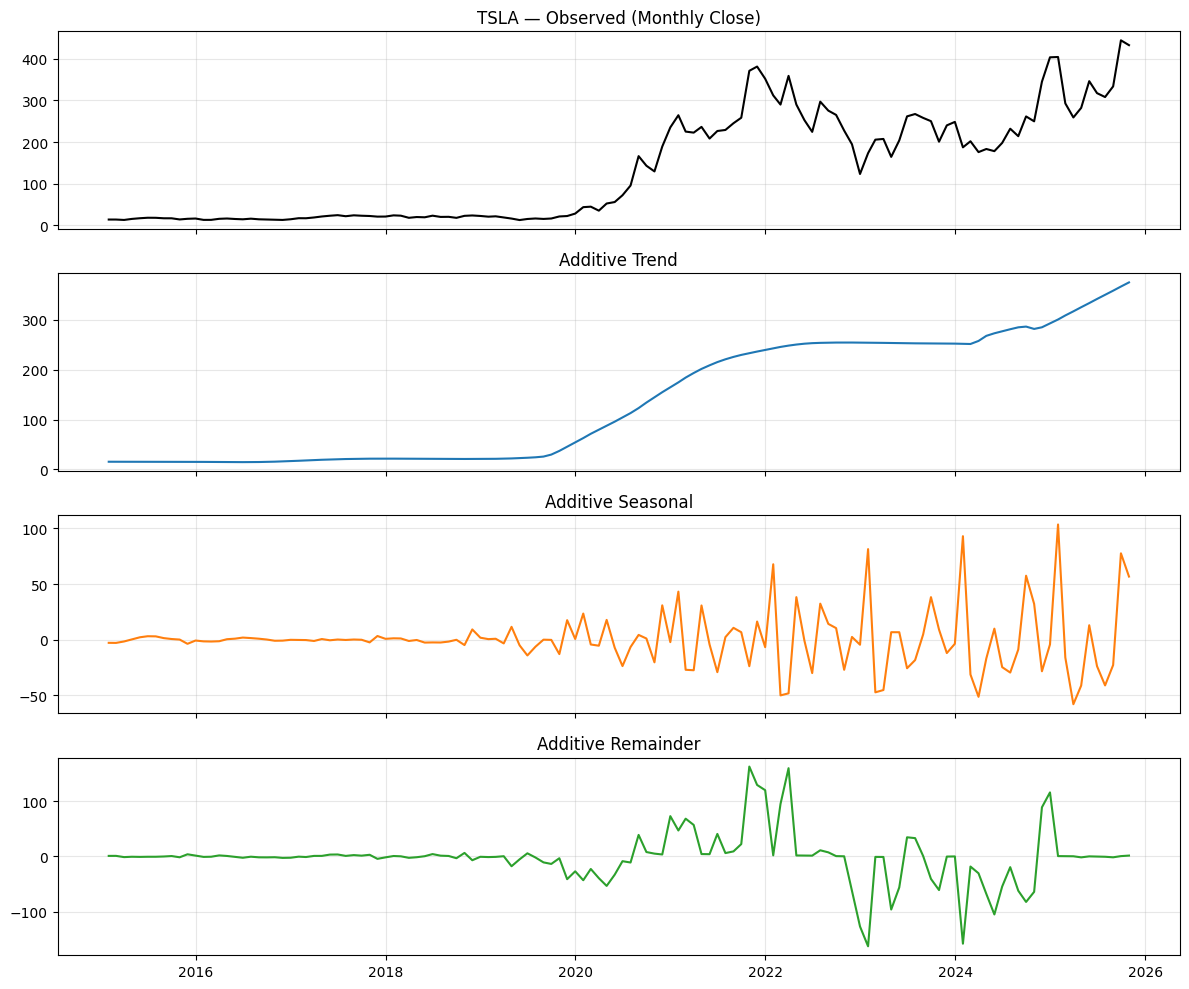

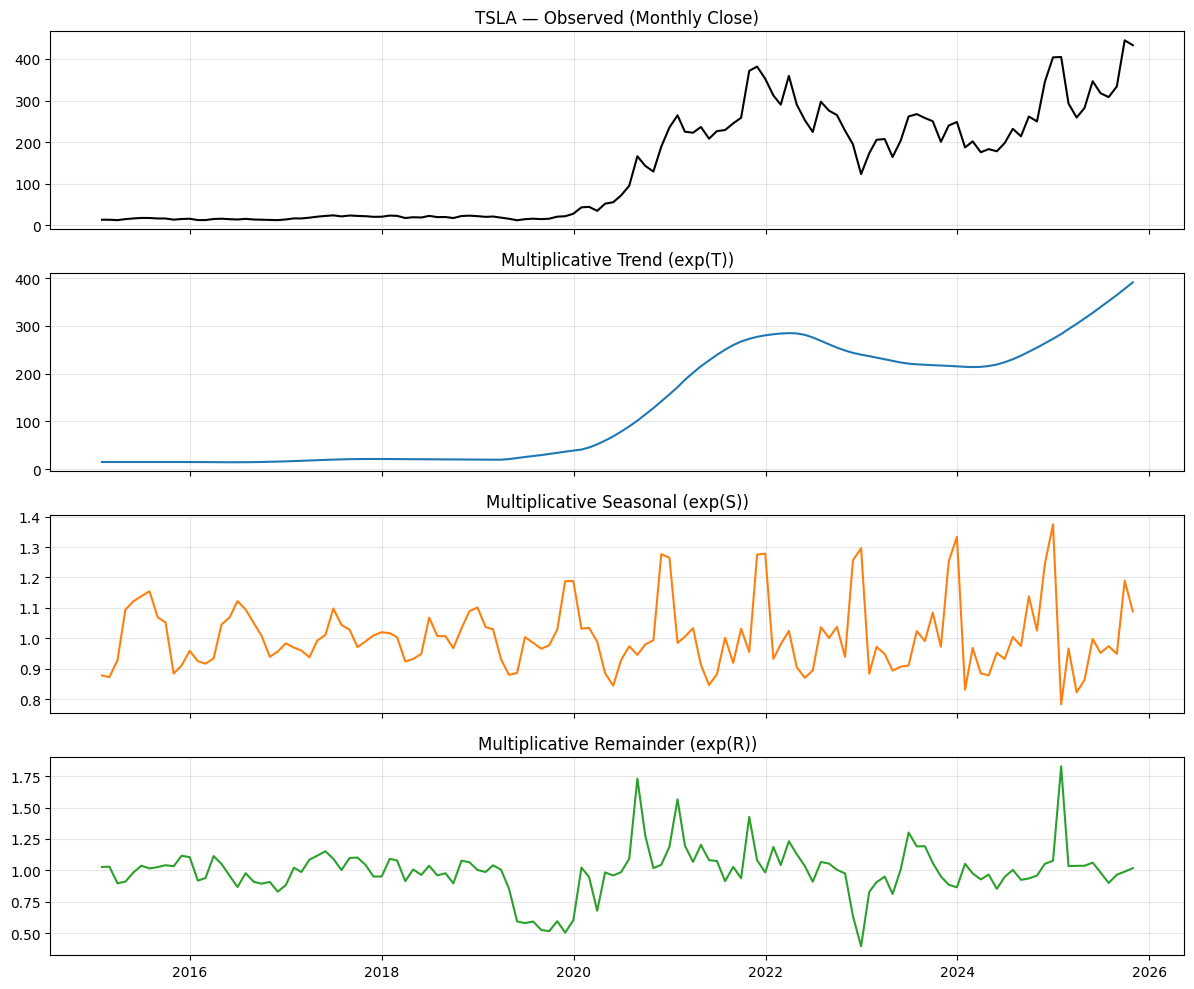

In [18]:
# ==============================================
# Colab Ï§ÄÎπÑ (ÌïÑÏöîÌï† ÎïåÎßå)
# ==============================================
# %pip -q install yfinance statsmodels

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

plt.rcParams["figure.figsize"] = (12, 5)

# ==============================================
# 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú & ÏõîÎßê ÏßëÍ≥Ñ
# ==============================================
symbol     = "TSLA"
start_date = "2015-01-01"
end_date   = None  # ÏµúÏã†ÍπåÏßÄ

# auto_adjust=TrueÎ°ú Î∞∞Îãπ/Î∂ÑÌï† Ï°∞Ï†ï Ï¢ÖÍ∞Ä ÏÇ¨Ïö© + Í≤ΩÍ≥† Î∞©ÏßÄ
px_d = yf.download(symbol, start=start_date, end=end_date, auto_adjust=True)
px_d.index = pd.to_datetime(px_d.index)

# ÏõîÎßê(MonthEnd) Ï¢ÖÍ∞ÄÎ°ú ÏßëÍ≥Ñ
px_m = px_d.resample("ME").last().dropna()
y = px_m["Close"].astype(float).copy()
y.name = "close"

print(f"{symbol}: {len(y)} obs | {y.index[0].date()} ~ {y.index[-1].date()}")

# ==============================================
# 2) STL Î∂ÑÌï¥ (Í∞ÄÎ≤ï / ÏäπÎ≤ï)
# ==============================================
PERIOD = 12  # ÏõîÎ≥Ñ Í≥ÑÏ†àÏ£ºÍ∏∞

# --- (A) Í∞ÄÎ≤ï Î™®Îç∏: y = Trend + Seasonal + Remainder
stl_add = STL(y, period=PERIOD, robust=True).fit()

# --- (B) ÏäπÎ≤ï Î™®Îç∏(Î°úÍ∑∏Î°ú Í∞ÄÎ≤ïÌôî): log(y) = T + S + R  ‚áí
#       y = exp(T) * exp(S) * exp(R)
eps = 0.0  # yÍ∞Ä ÏñëÏàòÏù¥ÎØÄÎ°ú 0Ïù¥Î©¥ Ï∂©Î∂Ñ. (ÎßåÏïΩ 0/ÏùåÏàò Í∞ÄÎä• Îç∞Ïù¥ÌÑ∞Î©¥ ÏûëÏùÄ eps Ï∂îÍ∞Ä)
y_log = np.log(y + eps)
stl_mul = STL(y_log, period=PERIOD, robust=True).fit()

trend_m = np.exp(stl_mul.trend)
season_m = np.exp(stl_mul.seasonal)
remainder_m = np.exp(stl_mul.resid)
y_recon_multiplicative = trend_m * season_m * remainder_m  # Î≥µÏõê Ï≤¥ÌÅ¨Ïö©

# Î≥µÏõê Ïò§Ï∞® ÌôïÏù∏(ÏàòÏπò Ïò§Ï∞® ÌóàÏö©)
recon_err = float(np.nanmean(np.abs((y - y_recon_multiplicative) / y))) * 100
print(f"[Multiplicative] Ïû¨Íµ¨ÏÑ± ÏÉÅÎåÄÏò§Ï∞®(ÌèâÍ∑† |y - T*S*R| / y): {recon_err:.6f}%")

# ==============================================
# 3) ÏãúÍ∞ÅÌôî
# ==============================================

# ---- (A) Í∞ÄÎ≤ï STL
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
axes[0].plot(y.index, y.values, color="black"); axes[0].set_title(f"{symbol} ‚Äî Observed (Monthly Close)")
axes[1].plot(y.index, stl_add.trend, color="tab:blue"); axes[1].set_title("Additive Trend")
axes[2].plot(y.index, stl_add.seasonal, color="tab:orange"); axes[2].set_title("Additive Seasonal")
axes[3].plot(y.index, stl_add.resid, color="tab:green"); axes[3].set_title("Additive Remainder")
for ax in axes: ax.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

# ---- (B) ÏäπÎ≤ï STL (Î°úÍ∑∏ Í∏∞Î∞ò ‚Üí ÏõêÏ≤ôÎèÑÎ°ú ÌëúÏãú)
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
axes[0].plot(y.index, y.values, color="black"); axes[0].set_title(f"{symbol} ‚Äî Observed (Monthly Close)")
axes[1].plot(y.index, trend_m, color="tab:blue"); axes[1].set_title("Multiplicative Trend (exp(T))")
axes[2].plot(y.index, season_m, color="tab:orange"); axes[2].set_title("Multiplicative Seasonal (exp(S))")
axes[3].plot(y.index, remainder_m, color="tab:green"); axes[3].set_title("Multiplicative Remainder (exp(R))")
for ax in axes: ax.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

# ==============================================
# 4) Í≥ÑÏ†àÏ°∞Ï†ï(series) ÎπÑÍµê (ÏÑ†ÌÉù)
#    - Í∞ÄÎ≤ï: y_sa_add = y - Seasonal
#    - ÏäπÎ≤ï: y_sa_mul = y / Seasonal
# ==============================================
#y_sa_add = y - stl_add.seasonal
#y_sa_mul = y / season_m

#plt.figure(figsize=(12,5))
#plt.plot(y.index, y.values, label="Observed", color="black")
#plt.plot(y.index, y_sa_add, label="Seasonally Adjusted (Additive)", linestyle="--")
#plt.plot(y.index, y_sa_mul, label="Seasonally Adjusted (Multiplicative)", linestyle=":")
#plt.plot(y.index, y_sa_add, linestyle="--")
#plt.plot(y.index, y_sa_mul, linestyle=":")
#plt.title(f"{symbol} ‚Äî Seasonally Adjusted (Additive vs Multiplicative)")
#plt.xlabel("Date"); plt.ylabel("Price")
#plt.legend(); plt.grid(True, alpha=0.3); plt.tight_layout(); plt.show()
